<a href="https://colab.research.google.com/github/debbysonino/LamasDataHack/blob/master/DataLearn_2019_Scaffold_basefilesecondprediction0.35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

&nbsp; ![alt text](https://s3.amazonaws.com/monday.com/static/svg/monday-logos/monday-footer-logo.svg)

#Model scaffold
This notebook is intended to get you up and running faster.

It has the basic scaffold of an ML model, including:
* Data loading
* Feature extraction
* Columns transformation
* Training
* Evaluating
* Submitting results

###Getting our depnedncies (and data!)
First we'll import our relevant libraries

In [0]:
# General DS libraries we are going to need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# Importing our base model
# [REDACTED ML MODEL USED]

# Imports for working with our large dataset
from sklearn.utils.random import sample_without_replacement
from sklearn.model_selection import train_test_split

# We need those for data manipulation and getting our features ready for the model
from sklearn.preprocessing import OneHotEncoder, Normalizer, Binarizer
from sklearn.compose import make_column_transformer

# These can be used to measure our model's performance
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Ignore DataFrame assignment warnings
pd.options.mode.chained_assignment = None


We set a few constants to use later on for sampeling and running the model

In [0]:
#@title Model parameters { run: "auto" }
# n_neighbors = 7 #@param {type:"slider", min:1, max:30, step:1}
group_name = "Lamassim" #@param {type:"string"}
samples_num = 1360000 #@param {type:"slider", min:0, max:1500000, step:10000}
n_jobs = -1 #@param {type:"slider", min:-1, max:32, step:1}
path_prefix = "https://storage.googleapis.com/mondaycom-datahack/final_sets" #@param ["https://storage.googleapis.com/mondaycom-datahack/final_sets", "https://mondaycom-datahack.s3.amazonaws.com/final_sets"] {allow-input: true}

Next we'll load all the different parts of our dataset

<br/>

_Our use my data loading [snippet](https://colab.research.google.com/drive/1_Y-sZ5eHIDlDUMuLCwfnbuJdLh0DTXmO#scrollTo=5HGlaJTEAYJu&line=23&uniqifier=1)!_

In [0]:
import os
import pandas as pd

# We define the datasets we want to load
datasets = ('accounts', 'users', 'events', 'subscriptions')
source_prefix = 'https://storage.googleapis.com/mondaycom-datahack/final_sets/'

local_dir = './datasets/datahack/'
file_prefix = 'train_'
file_suffix = ''
file_extension = 'csv'

# We create a directory for the datasets if it doesn't exist
if not os.path.exists(local_dir):
    os.makedirs(local_dir)

# For each dataset we want, we check if we already downloaded it and fix it if we didn't
for dataset in datasets:
  if not os.path.isfile('{}{}{}{}.{}'.format(local_dir, file_prefix, dataset, file_suffix, file_extension)):
    !curl {source_prefix}{file_prefix}{dataset}{file_suffix}.{file_extension} --output {local_dir}{file_prefix}{dataset}{file_suffix}.{file_extension}

  # Load the datasets into a DataFrame using pandas
  globals()['{}{}'.format(file_prefix, dataset)] = pd.read_csv('{}{}{}{}.{}'.format(local_dir, file_prefix, dataset, file_suffix, file_extension), low_memory=False)

In [0]:
import os
import pandas as pd

# We define the datasets we want to load
datasets = ('accounts', 'users', 'events', 'subscriptions')
source_prefix = 'https://storage.googleapis.com/mondaycom-datahack/final_sets/'

local_dir = './datasets/datahack/'
file_prefix = 'test_'
file_suffix = ''
file_extension = 'csv'

# We create a directory for the datasets if it doesn't exist
if not os.path.exists(local_dir):
    os.makedirs(local_dir)

# For each dataset we want, we check if we already downloaded it and fix it if we didn't
for dataset in datasets:
  if not os.path.isfile('{}{}{}{}.{}'.format(local_dir, file_prefix, dataset, file_suffix, file_extension)):
    !curl {source_prefix}{file_prefix}{dataset}{file_suffix}.{file_extension} --output {local_dir}{file_prefix}{dataset}{file_suffix}.{file_extension}

  # Load the datasets into a DataFrame using pandas
  globals()['{}{}'.format(file_prefix, dataset)] = pd.read_csv('{}{}{}{}.{}'.format(local_dir, file_prefix, dataset, file_suffix, file_extension), low_memory=False)

We need to add our test sets to our train sets and work on both at the same time.

We'll split them back up before training and inference.

In [5]:
accounts = train_accounts.append(test_accounts)
users = train_users.append(test_users)
events = train_events.append(test_events)
subscriptions = train_subscriptions.append(test_subscriptions)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


###Feature engineering
In this block we add a new feature of `[REDACTED]` extracted from the user `[REDACTED]`

We also seperate all the `[REDACTED]` users into a different DataFrame

In [0]:
users['[REDACTED]'] = users['REDACTED'].apply(lambda x: "[REDACTED]")
[REDACTED] = users[users["[REDACTED]"] == "[REDACTED]"]

Let's enrich our data a bit

In [0]:
accounts["numuser"]=users.groupby("account_id").user_id.size()
accounts["numisadmin"]=users.groupby("account_id").is_admin.sum()
accounts["numenabled"]=users.groupby("account_id").enabled.sum()
accounts["numpending"]=users.groupby("account_id").pending.sum()
accounts["numcountry"]=users.groupby("account_id").country.count()
accounts["numregion"]=users.groupby("account_id").region.count()
accounts["numrcity"]=users.groupby("account_id").city.count()
accounts["numphoto"]=users.groupby("account_id").has_photo.sum()
accounts["nummos"]=users.groupby("account_id").os.count()
accounts["nummobile"]=users.groupby("account_id").device.count()
accounts["nummobile2"]=users[users["device"]=="mobile"].groupby("account_id").device.count()
accounts["numchrome"]=users[users["browser"]=="chrome"].groupby("account_id").browser.count()
#accounts["vetekuser"]=users.groupby("account_id").created_at.min()
#accounts["vetekactive"]=users.groupby("account_id").became_active_at.min()


#accounts["vetekuser"]=users.groupby("account_id").created_at.min()
#accounts["vetekactive"]=users.groupby("account_id").became_active_at.min()



In [12]:

accounts["nummobile2"]=users[users[device=="mobile"].groupby("account_id").device.count()

SyntaxError: ignored

In [0]:
all_features=accounts

In [8]:
all_features[all_features['lead_score'].isna()].shape[0]

71683

###Data preperation
After we created our raw features we need to make sure the fit the way our ML model expects to receive them.

In [0]:
# We map our features into different types
categorical_features = ['country', 'device',  'industry','os', 'payment_currency','plan_id', 'region','user_goal',
                       'utm_cluster_id','team_size' ]

normalized_features = ['collection_21_days', 'company_size', 'max_team_size', 'min_team_size','mrr',
                       "numuser", "numisadmin",  "numenabled", "numpending","numcountry", "numcountry", 
                     "numregion","numrcity",  "numphoto", "nummos", "nummobile", "nummobile2",  "numchrome", 'time_diff'
                      ]

binary_features = ['paying', 'has_logo']

untouched_features = ['account_id']

target = ['lead_score']

# And create a column transformer to handle the manipulation for us
preprocess = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    (Normalizer(), normalized_features),
    (Binarizer(), binary_features)
)


In [27]:
accounts.describe()


,account_id,churn_reason,collection_21_days,company_size,has_logo,lead_score,max_team_size,min_team_size,mrr,paying,plan_id,time_diff,numuser,numisadmin,numenabled,numpending,numcountry,numregion,numrcity,numphoto,nummos,nummobile,nummobile2,numchrome
count,1.433661e+06,25256.000000,1.433661e+06,2.984880e+05,1433661.0,1.361978e+06,1.278324e+06,1.278324e+06,48000.000000,1.433661e+06,30089.000000,1.191655e+06,1.432202e+06,1.432202e+06,1.432202e+06,1.432202e+06,1.432202e+06,1.432202e+06,1.432202e+06,1.432202e+06,1.432202e+06,1.432202e+06,455338.000000,917330.000000
mean,7.168299e+05,14.748495,7.696428e+00,1.099229e+04,1.0,2.489468e-02,1.759639e+01,1.093182e+01,38.804604,2.098753e-02,441.728140,-1.436862e+00,1.584149e+00,1.099776e+00,1.349755e+00,2.830474e-01,1.330080e+00,1.261502e+00,1.251658e+00,1.584149e+00,1.350243e+00,1.350336e+00,1.124859,1.311597
std,4.138617e+05,3.266979,1.020891e+02,5.959159e+04,0.0,1.558042e-01,6.853256e+01,5.327824e+01,68.695328,1.433425e-01,412.173722,4.720317e+00,3.040914e+00,5.841095e-01,2.042651e+00,1.991992e+00,1.955949e+00,1.895092e+00,1.891116e+00,3.040914e+00,1.963898e+00,1.963990e+00,0.694487,1.664263
min,1.000000e+00,1.000000,-1.440000e+03,1.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,9.000000,-1.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,3.584160e+05,13.000000,0.000000e+00,3.000000e+01,1.0,0.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000e+00,208.000000,-5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000
50%,7.168300e+05,15.000000,0.000000e+00,2.100000e+02,1.0,0.000000e+00,5.000000e+00,2.000000e+00,25.000000,0.000000e+00,232.000000,-3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000
75%,1.075244e+06,18.000000,0.000000e+00,2.750000e+03,1.0,0.000000e+00,1.000000e+01,6.000000e+00,48.000000,0.000000e+00,816.000000,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000
max,1.433659e+06,18.000000,2.080800e+04,2.300000e+06,1.0,1.000000e+00,5.000000e+02,5.000000e+02,3468.000000,1.000000e+00,1678.000000,1.400000e+01,2.400000e+02,5.700000e+01,2.250000e+02,1.960000e+02,2.180000e+02,2.170000e+02,2.170000e+02,2.400000e+02,2.200000e+02,2.200000e+02,62.000000,189.000000


###Re-splitting
We now need to split our data back to the original train set and test set.

We also make sure we keep only the columns we want in the data frame (the features)

In [42]:
# Getting only the relevant features from the dataset
dataset = all_features[categorical_features + normalized_features + binary_features + untouched_features + target]

# Filling empty values with default values 
dataset.loc[:,categorical_features] = dataset[categorical_features].fillna('')
dataset.loc[:,normalized_features +
              binary_features +
              untouched_features] = dataset[normalized_features +
                                            binary_features +
                                            untouched_features].fillna(0)

# Splitting them back up to the original train/test split
dataset_train = dataset[dataset.reset_index().account_id.isin(train_accounts.account_id)]
dataset_test = dataset[dataset.reset_index().account_id.isin(test_accounts.account_id)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [0]:
# Splitting them back up to the original train/test split
dataset_train = dataset.loc[~(dataset['lead_score'].isna())].reset_index().drop(['index'],axis=1)
dataset_test = dataset.loc[(dataset['lead_score'].isna())].reset_index().drop(['index'],axis=1)

In [44]:
dataset_test[dataset_test['lead_score'].isna()].shape,dataset[dataset['lead_score'].isna()].shape

((71683, 33), (71683, 33))

###Setting everything up
Our dataset is large (1,500,000+ accounts, each has a few users, each has events for every day)

We need to work on a smaller batch of the training data so we can iterate more quickly.

Once we find a good architecture we can increase the sample size to increase the accuracy.

In [0]:
sampled_dataset_train = dataset_train.iloc[sample_without_replacement(dataset_train.shape[0], samples_num)]

In [47]:
# We map our features into different types
categorical_features = ['country', 'device', 'industry','os' ]
#, 'payment_currency','plan_id', 'region','user_goal',
  #                     'utm_cluster_id','team_size'

normalized_features = ['collection_21_days', 'company_size', 'max_team_size', 'min_team_size','mrr',
                       "numuser", "numisadmin",  "numenabled", "numpending","numcountry", "numcountry", 
                     "numregion","numrcity",  "numphoto", "nummos", "nummobile", "nummobile2",  "numchrome", 'time_diff'
                      ]

binary_features = ['paying', 'has_logo']

untouched_features = ['account_id']

target = ['lead_score']

# And create a column transformer to handle the manipulation for us
preprocess = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    (Normalizer(), normalized_features),
    (Binarizer(), binary_features)
)
# Getting only the relevant features from the dataset
dataset = all_features[categorical_features + normalized_features + binary_features + untouched_features + target]

# Filling empty values with default values 
dataset.loc[:,categorical_features] = dataset[categorical_features].fillna('')
dataset.loc[:,normalized_features +
              binary_features +
              untouched_features] = dataset[normalized_features +
                                            binary_features +
                                            untouched_features].fillna(0)

# Splitting them back up to the original train/test split
dataset_train = dataset[dataset.reset_index().account_id.isin(train_accounts.account_id)]
dataset_test = dataset[dataset.reset_index().account_id.isin(test_accounts.account_id)]
# Splitting them back up to the original train/test split
dataset_train = dataset.loc[~(dataset['lead_score'].isna())].reset_index().drop(['index'],axis=1)
dataset_test = dataset.loc[(dataset['lead_score'].isna())].reset_index().drop(['index'],axis=1)
sampled_dataset_train = dataset_train.iloc[sample_without_replacement(dataset_train.shape[0], samples_num)]
# We fit our column transformer on both the train and the test sets
preprocess.fit(sampled_dataset_train.append(dataset_test))

# We use transform to finally manipulate the features of our training set
X = preprocess.transform(sampled_dataset_train)

# Seperating the label
y = sampled_dataset_train.pop('lead_score')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [0]:
# You now need to split the data into YOUR OWN training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# For standardization purposes we store y_test in a y_true variable
y_true = y_test

In [0]:
## (when using google colab)
! pip install catboost
! pip install plotly_express

In [0]:
## General
import os 
import joblib
import requests
from google_drive_downloader import GoogleDriveDownloader as gdd

## Data manipulation
import pandas as pd
import numpy as np

## Modeling
### Modeling pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
 
### Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier    
from catboost import CatBoostClassifier, Pool

## Visuatlization
import plotly 
import plotly.express as px
import plotly.graph_objects as go

In [111]:
parameters = {'n_estimators': [50], #[50,100,200]
             'max_depth': [5], #[5,10,15],
             'criterion': ['gini', 'entropy'],
             'max_features': [15]} #[int(np.log2(X_train.shape[1])), int(np.sqrt(X_train.shape[1]))]

rf_cv = GridSearchCV(RandomForestClassifier(class_weight='balanced'), 
                   parameters, 
                   n_jobs = -1,
                   cv = 5,
                   refit = True,
                   scoring = 'f1')

rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [113]:
rf_best_model = rf_cv.best_estimator_
rf_best_model

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=15,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
y_train_pred = rf_best_model.predict(X_train) 

In [115]:
accuracy_score(y_train_pred, y_train),f1_score(y_train, y_train_pred),precision_score(y_train, y_train_pred),recall_score(y_train, y_train_pred)

(0.8667554179566563,
 0.2626502308608239,
 0.15226502984615078,
 0.9549333499439392)

In [110]:
confusion_matrix(y_train_pred, y_train)



AttributeError: ignored

## XGBOOST

In [55]:

parameters = {
    "gamma": [0.2, 0.5],
    "learning_rate": [0.1]
}

xgb_cv = GridSearchCV(XGBClassifier(class_weight='balanced'), 
                       parameters, 
                       n_jobs = -1,
                       cv = 5,
                       refit = True,
                       scoring = 'f1')

xgb_cv.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight='balanced',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'gamma': [0.2, 0.5], 'learning_rate': [0.1]},
             pre_dispatch='2*n_jobs'

In [56]:
xgb_best_model = xgb_cv.best_estimator_
xgb_best_model

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0.5, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_train_pred = xgb_best_model.predict(X_train) 

In [58]:
accuracy_score(y_train_pred, y_train),f1_score(y_train, y_train_pred),precision_score(y_train, y_train_pred),recall_score(y_train, y_train_pred)

(0.9765046439628483,
 0.16328555678059536,
 0.7099712368168744,
 0.09225115236078237)

## Catboost

In [0]:
parameters = {
    "reg_lambda": [0, 0.2, 0.5],
    "learning_rate": [0.1],
    "loss_function": ['Logloss'] #F1, recall, ... 
}

cat_cv = GridSearchCV(CatBoostClassifier(class_weights = [0.98, 0.02]), 
                       parameters, 
                       n_jobs = -1,
                       cv = 5,
                       refit = True,
                       scoring = 'f1',
                       verbose = 0)

cat_cv.fit(X_train, y_train)

CatBoostError: ignored

###Running the model
It's the money time, we can finally run our model!

First we need to created it, and train(fit) it.

In [116]:
# Now we need to get the predictions of our test set
%time y_pred = rf_best_model.predict(X_test)

CPU times: user 278 ms, sys: 4 ms, total: 282 ms
Wall time: 281 ms


###Model evaluation
Now that we have our model and it can predict the lead score based on features, we need a way to test if it's any good

####Classification report
We use classification_report to get different metrics comparing our prediction to the ground truth.

In [117]:
print(classification_report(y_true, y_pred, target_names=['Not Lead', 'Lead']))

              precision    recall  f1-score   support

    Not Lead       1.00      0.86      0.93     66270
        Lead       0.16      0.95      0.27      1730

    accuracy                           0.87     68000
   macro avg       0.58      0.91      0.60     68000
weighted avg       0.98      0.87      0.91     68000



We can also get the MCC score of the model

In [118]:
print('Acc:  {}'.format(metrics.accuracy_score(y_true, y_pred)))
print('MCC: {}'.format(metrics.matthews_corrcoef(y_true, y_pred)))
print('F1:  {}'.format(metrics.f1_score(y_true, y_pred)))

Acc:  0.867
MCC: 0.35510245045873673
F1:  0.26733635774465325


####Plotting the confusion matrix
Confusion matrices are useful for comparing our predictions

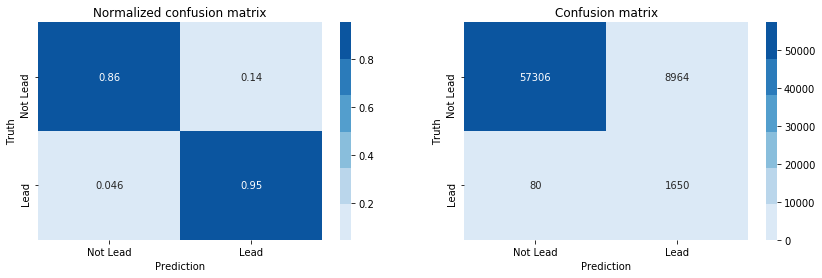

In [119]:
fig, axs = plt.subplots(ncols=2, figsize=(14,4))

cm = confusion_matrix(y_true, y_pred)
ticks = ['Not Lead', 'Lead']
cmap = sns.color_palette("Blues")

# We normalize our data to see more accurate comparsion
sns.heatmap(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], annot=True, ax=axs[0], cmap=cmap)
axs[0].set(title="Normalized confusion matrix", xlabel="Prediction", ylabel="Truth", xticklabels=ticks, yticklabels=ticks)

# We also plot the original numbers to get the whole picture
sns.heatmap(cm, annot=True, ax=axs[1], fmt='g', cmap=cmap)
axs[1].set(title="Confusion matrix", xlabel="Prediction", ylabel="Truth", xticklabels=ticks, yticklabels=ticks);

###Submitting results
After you ran several iterations, and you think your model is good enough, you can send it to us and we'll add your score on the leaderboard!

You have to get the results into the following format:
```python
{"9023749": 1, "9837598": 0, ...}
```

This is a dictionary where the keys are `account_id`s and the values are the predicted lead_score.

_Make sure you send us **all** the test accounts!_

_There should be exactly `71,683` of them!_

####Prediction
First of all, just like before, we have to predict the lead_score.

This time you need to use the test set _we_ provided.

In [0]:
dataset_test = dataset[dataset['lead_score'].isna()]
submission_account_ids = dataset_test.account_id

X_submission = preprocess.transform(dataset_test)

y_pred_submission = rf_best_model.predict(X_submission)

####Submission
Now that we have our submission predictions, we need to pack them up into a compatible format for our server to handle.


In [0]:
# Creating a dictionary where the keys are the account_ids
# and the values are your predictions
prediction = dict(zip(map(str, map(int,submission_account_ids)), map(int,y_pred_submission)))


In [0]:
prediction


We now just send the results to our server and wait for the score!

In [122]:
# Importing stuff for http requests
from urllib import request
import json

# We validate first that we actually send all the test accounts expected to be sent
if y_pred_submission.shape[0] != 71683 or submission_account_ids.shape[0] != 71683:
  raise Exception("You have to send all of the accounts! Expected: (71683, 71683), Got: ({}, {})".format(y_pred_submission.shape[0], submission_account_ids.shape[0]))

if "group_name" not in vars() or group_name == "":
  group_name = input("Please enter your group's name:")

data = json.dumps({'submitter': group_name, 'predictions': prediction}).encode('utf-8')

req = request.Request(f"https://leaderboard.datahack.org.il/monday/api/",
                      headers={'Content-Type': 'application/json'},
                      data=data)

res = request.urlopen(req)
print(json.load(res))

{'member': 'Lamassim', 'rank': 1, 'score': 0.3547099909467651}
